d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_

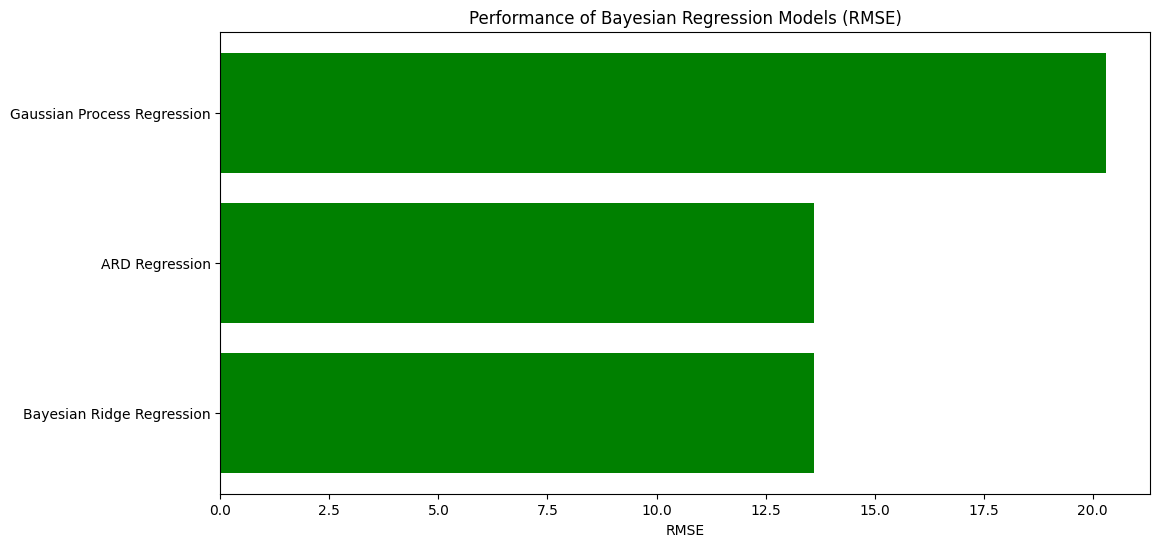

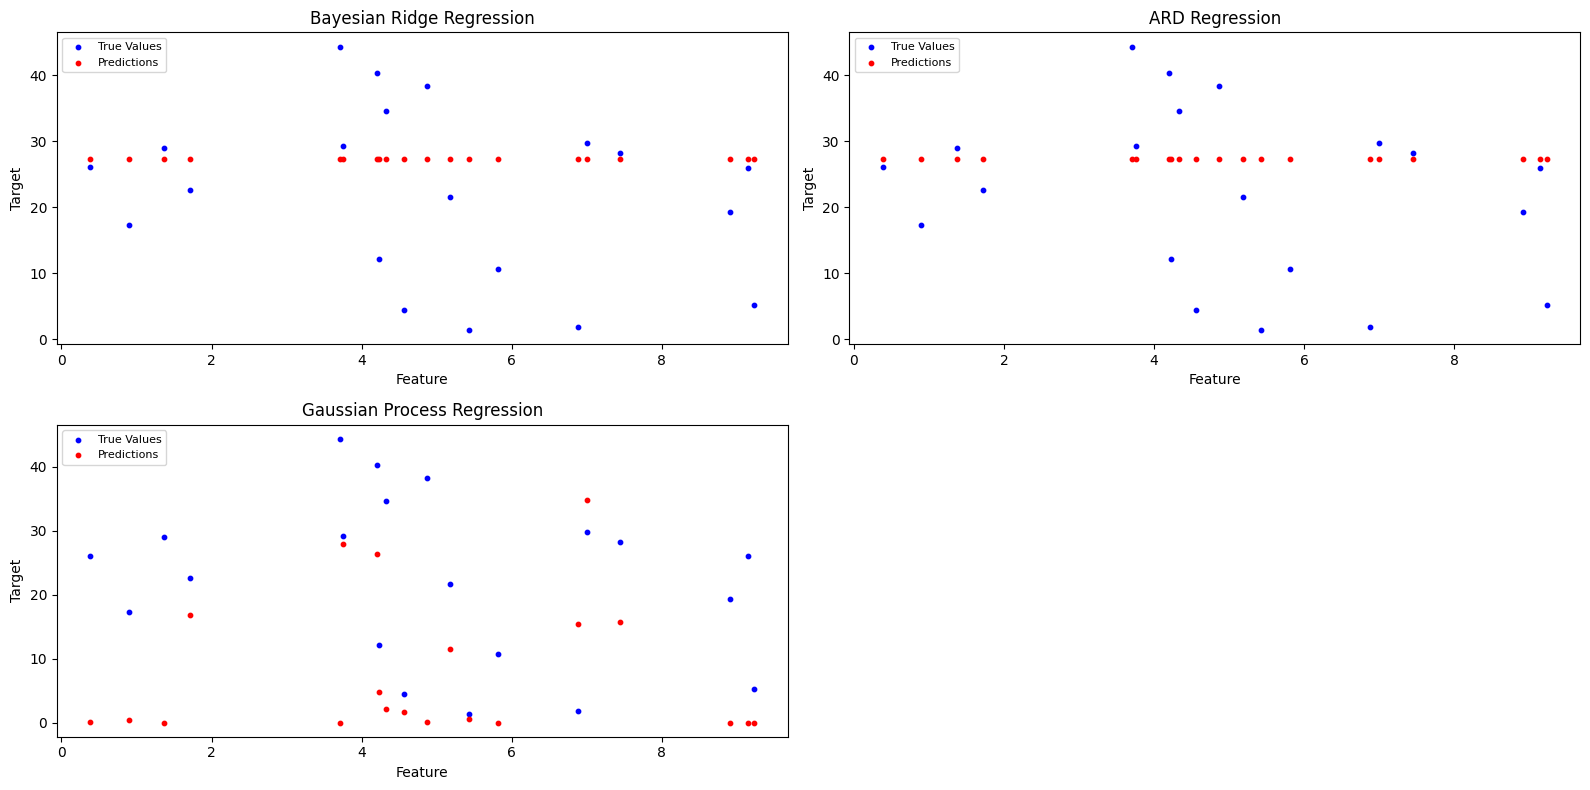

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, ARDRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
X, y = np.random.rand(100, 1) * 10, np.random.rand(100) * 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Bayesian models
models_bayesian = {
    "Bayesian Ridge Regression": BayesianRidge(),
    "ARD Regression": ARDRegression(),
    "Gaussian Process Regression": GaussianProcessRegressor(kernel=C(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2)), random_state=42),
}

# Train, predict, and evaluate models
results_bayesian = {}
predictions_bayesian = {}
for name, model in models_bayesian.items():
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results_bayesian[name] = rmse
    predictions_bayesian[name] = y_pred

# Visualize RMSE
plt.figure(figsize=(12, 6))
plt.barh(list(results_bayesian.keys()), list(results_bayesian.values()), color='green')
plt.xlabel("RMSE")
plt.title("Performance of Bayesian Regression Models (RMSE)")
plt.show()

# Visualize Predictions vs. True Values
plt.figure(figsize=(16, 8))
for i, (name, y_pred) in enumerate(predictions_bayesian.items()):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_test, y_test, color='blue', label='True Values', s=10)
    plt.scatter(X_test, y_pred, color='red', label='Predictions', s=10)
    plt.title(name)
    plt.legend(loc="upper left", fontsize=8)
    plt.xlabel("Feature")
    plt.ylabel("Target")

plt.tight_layout()
plt.show()

**贝叶斯回归模型 (Bayesian Regression Models)** 利用贝叶斯统计理论，将模型参数视为随机变量，用概率分布描述不确定性。这种模型特别适合需要估计不确定性或先验知识的场景。

---

### **贝叶斯回归模型分类**

#### **1. Bayesian Ridge Regression**
- **实现库**: Scikit-learn 提供
- **特点**:
  - 在 Ridge 回归的基础上，使用贝叶斯方法对模型参数进行概率分布估计。
- **适用场景**:
  - 需要估计参数分布及其不确定性的任务。
- **优缺点**:
  - **优点**: 提供参数的不确定性估计，减少过拟合。
  - **缺点**: 对大规模数据计算较慢。

#### **2. Automatic Relevance Determination (ARD) Regression**
- **实现库**: Scikit-learn 提供
- **特点**:
  - 贝叶斯岭回归的扩展，通过自动选择与目标相关的特征。
  - 每个特征都有独立的正则化参数。
- **适用场景**:
  - 高维数据，特征稀疏但相关性未知。
- **优缺点**:
  - **优点**: 能自动选择重要特征。
  - **缺点**: 训练时间较长。

#### **3. Gaussian Process Regression (GPR)**
- **实现库**: Scikit-learn 提供
- **特点**:
  - 基于高斯过程，利用核函数建模，适用于非线性回归。
- **适用场景**:
  - 小数据集，复杂非线性关系。
- **优缺点**:
  - **优点**: 捕捉非线性关系，提供预测分布。
  - **缺点**: 对大数据集计算复杂度较高。

---


### **模型选型建议**

| **任务特点**                | **推荐模型**                                     |
|-----------------------------|-------------------------------------------------|
| 数据线性，需估计不确定性    | Bayesian Ridge Regression                      |
| 高维稀疏特征选择            | ARD Regression                                 |
| 非线性关系，小规模数据       | Gaussian Process Regression (GPR)             |

---

### **扩展模型**
如需更复杂的贝叶斯回归（如贝叶斯神经网络），可以使用以下扩展库：
1. **PyMC3** 或 **PyMC**：支持贝叶斯网络建模。
2. **GPy**：支持高斯过程建模的专用库。
